# Regression using Libraries

Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import MinMaxScaler


from keras import Sequential # To help build Deep Learning ANN/RNN
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# import pandas_datareader as web

In [2]:
dataset = pd.read_csv('../input/nifty50-stock-market-data/CIPLA.csv') # Taking example of Cipla data

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5097 entries, 0 to 5096
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5097 non-null   object 
 1   Symbol              5097 non-null   object 
 2   Series              5097 non-null   object 
 3   Prev Close          5097 non-null   float64
 4   Open                5097 non-null   float64
 5   High                5097 non-null   float64
 6   Low                 5097 non-null   float64
 7   Last                5097 non-null   float64
 8   Close               5097 non-null   float64
 9   VWAP                5097 non-null   float64
 10  Volume              5097 non-null   int64  
 11  Turnover            5097 non-null   float64
 12  Trades              2247 non-null   float64
 13  Deliverable Volume  4583 non-null   float64
 14  %Deliverble         4583 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 597.4

In [4]:
dataset.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5097.000000,5097.000000,5097.000000,5097.000000,5097.000000,5097.000000,5097.000000,5.097000e+03,5.097000e+03,2247.000000,4.583000e+03,4583.000000
mean,530.789474,531.660516,539.682343,522.457132,530.689043,530.650343,531.123182,1.322521e+06,5.881325e+13,38759.305296,7.061543e+05,0.521713
std,290.808726,291.394460,296.611119,285.197376,290.582103,290.586557,290.822940,1.696136e+06,9.180069e+13,33646.911109,6.961586e+05,0.145165
min,160.100000,150.550000,169.450000,145.000000,152.000000,160.100000,158.140000,5.050000e+02,5.400606e+10,613.000000,2.013000e+03,0.107400
25%,305.350000,305.900000,309.450000,302.500000,305.550000,305.350000,305.700000,3.487880e+05,1.368438e+13,20859.000000,2.711600e+05,0.422800
50%,446.300000,446.700000,451.400000,439.150000,445.500000,446.300000,445.690000,1.008068e+06,3.498946e+13,30966.000000,5.541010e+05,0.524500
75%,650.450000,651.000000,661.000000,641.500000,651.000000,650.250000,650.470000,1.677331e+06,7.007531e+13,44288.500000,9.257385e+05,0.620850
max,1465.250000,1537.000000,1537.000000,1430.000000,1466.050000,1465.250000,1460.430000,2.931347e+07,1.958104e+15,448337.000000,1.081558e+07,0.994500


In [5]:
dataset.head(5)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,CIPLA,EQ,1349.40,1410.0,1457.35,1380.05,1457.35,1457.35,1441.36,21060,3.035496e+12,NaN,NaN,NaN
1,2000-01-04,CIPLA,EQ,1457.35,1537.0,1537.00,1430.00,1466.05,1465.25,1460.43,30215,4.412698e+12,NaN,NaN,NaN
2,2000-01-05,CIPLA,EQ,1465.25,1474.0,1474.00,1365.00,1441.00,1435.05,1428.11,33799,4.826872e+12,NaN,NaN,NaN
3,2000-01-06,CIPLA,EQ,1435.05,1434.0,1435.00,1349.00,1365.00,1355.85,1390.55,33083,4.600356e+12,NaN,NaN,NaN
4,2000-01-07,CIPLA,EQ,1355.85,1370.0,1389.90,1247.40,1247.40,1247.55,1267.49,66536,8.433351e+12,NaN,NaN,NaN


In [6]:
dataset.tail(5)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
5092,2020-06-24,CIPLA,EQ,659.8,660.00,662.25,628.30,633.10,631.20,643.69,6955964,4.477515e+14,131675.0,2297722.0,0.3303
5093,2020-06-25,CIPLA,EQ,631.2,632.00,642.00,629.15,637.95,634.90,634.51,5816412,3.690547e+14,109040.0,1620625.0,0.2786
5094,2020-06-26,CIPLA,EQ,634.9,639.00,643.65,631.60,635.00,634.90,636.33,3847867,2.448517e+14,72417.0,1318898.0,0.3428
5095,2020-06-29,CIPLA,EQ,634.9,637.00,648.00,635.40,643.95,644.90,643.40,6772345,4.357304e+14,113451.0,1842884.0,0.2721
5096,2020-06-30,CIPLA,EQ,644.9,647.95,649.90,638.00,640.70,640.25,643.37,4319890,2.779280e+14,73014.0,1552880.0,0.3595


In [7]:
dataset['Datetime'] = pd.to_datetime(dataset['Date'])

In [8]:
dataset.head(5)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Datetime
0,2000-01-03,CIPLA,EQ,1349.40,1410.0,1457.35,1380.05,1457.35,1457.35,1441.36,21060,3.035496e+12,NaN,NaN,NaN,2000-01-03
1,2000-01-04,CIPLA,EQ,1457.35,1537.0,1537.00,1430.00,1466.05,1465.25,1460.43,30215,4.412698e+12,NaN,NaN,NaN,2000-01-04
2,2000-01-05,CIPLA,EQ,1465.25,1474.0,1474.00,1365.00,1441.00,1435.05,1428.11,33799,4.826872e+12,NaN,NaN,NaN,2000-01-05
3,2000-01-06,CIPLA,EQ,1435.05,1434.0,1435.00,1349.00,1365.00,1355.85,1390.55,33083,4.600356e+12,NaN,NaN,NaN,2000-01-06
4,2000-01-07,CIPLA,EQ,1355.85,1370.0,1389.90,1247.40,1247.40,1247.55,1267.49,66536,8.433351e+12,NaN,NaN,NaN,2000-01-07


In [9]:
dataset = dataset.drop(['Date'], axis = 1) 

In [10]:
dataset.head(5)

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Datetime
0,CIPLA,EQ,1349.40,1410.0,1457.35,1380.05,1457.35,1457.35,1441.36,21060,3.035496e+12,NaN,NaN,NaN,2000-01-03
1,CIPLA,EQ,1457.35,1537.0,1537.00,1430.00,1466.05,1465.25,1460.43,30215,4.412698e+12,NaN,NaN,NaN,2000-01-04
2,CIPLA,EQ,1465.25,1474.0,1474.00,1365.00,1441.00,1435.05,1428.11,33799,4.826872e+12,NaN,NaN,NaN,2000-01-05
3,CIPLA,EQ,1435.05,1434.0,1435.00,1349.00,1365.00,1355.85,1390.55,33083,4.600356e+12,NaN,NaN,NaN,2000-01-06
4,CIPLA,EQ,1355.85,1370.0,1389.90,1247.40,1247.40,1247.55,1267.49,66536,8.433351e+12,NaN,NaN,NaN,2000-01-07


In [11]:
dataset = dataset.set_index('Datetime')

In [12]:
dataset.head(5)

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Datetime,,,,,,,,,,,,,,
2000-01-03,CIPLA,EQ,1349.40,1410.0,1457.35,1380.05,1457.35,1457.35,1441.36,21060,3.035496e+12,NaN,NaN,NaN
2000-01-04,CIPLA,EQ,1457.35,1537.0,1537.00,1430.00,1466.05,1465.25,1460.43,30215,4.412698e+12,NaN,NaN,NaN
2000-01-05,CIPLA,EQ,1465.25,1474.0,1474.00,1365.00,1441.00,1435.05,1428.11,33799,4.826872e+12,NaN,NaN,NaN
2000-01-06,CIPLA,EQ,1435.05,1434.0,1435.00,1349.00,1365.00,1355.85,1390.55,33083,4.600356e+12,NaN,NaN,NaN
2000-01-07,CIPLA,EQ,1355.85,1370.0,1389.90,1247.40,1247.40,1247.55,1267.49,66536,8.433351e+12,NaN,NaN,NaN


In [13]:
dataset.tail(5)

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Datetime,,,,,,,,,,,,,,
2020-06-24,CIPLA,EQ,659.8,660.00,662.25,628.30,633.10,631.20,643.69,6955964,4.477515e+14,131675.0,2297722.0,0.3303
2020-06-25,CIPLA,EQ,631.2,632.00,642.00,629.15,637.95,634.90,634.51,5816412,3.690547e+14,109040.0,1620625.0,0.2786
2020-06-26,CIPLA,EQ,634.9,639.00,643.65,631.60,635.00,634.90,636.33,3847867,2.448517e+14,72417.0,1318898.0,0.3428
2020-06-29,CIPLA,EQ,634.9,637.00,648.00,635.40,643.95,644.90,643.40,6772345,4.357304e+14,113451.0,1842884.0,0.2721
2020-06-30,CIPLA,EQ,644.9,647.95,649.90,638.00,640.70,640.25,643.37,4319890,2.779280e+14,73014.0,1552880.0,0.3595


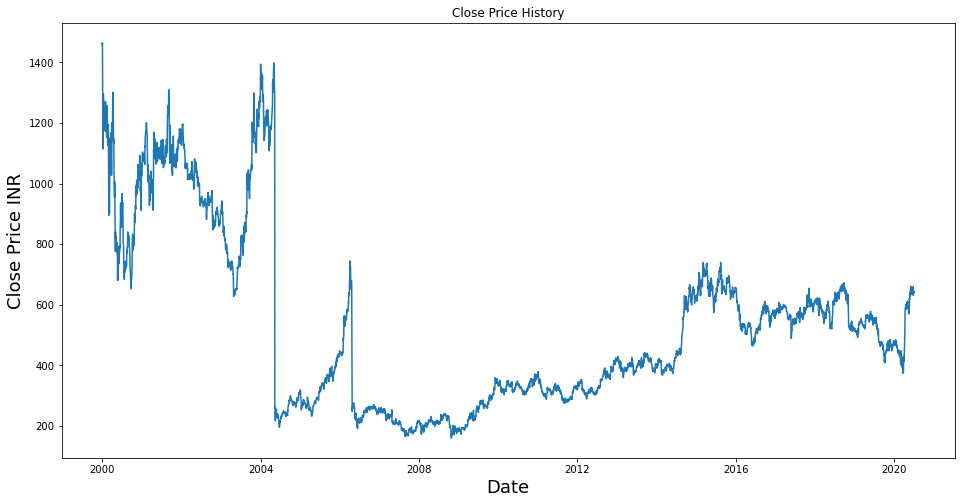

In [14]:
#Visualizing the closing price history for the training dataset
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(dataset['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price INR',fontsize=18)
plt.show()

In [15]:
#Creating a new dataframe with only the 'Close' column
data = dataset.filter(['Close'])
#Converting the dataframe to a numpy array
final_dataset = data.values
#Computing the number of rows to train the model on
training_data_len = math.ceil(len(final_dataset)*.75)

In [16]:
print("Training Dataset length:", training_data_len)

Training Dataset length: 3823


In [17]:
#Scale the all of the data to be values between 0 and 1 for Training Dataset
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(final_dataset)

In [18]:
#Create the scaled training data set 
train_data = scaled_data[0 : training_data_len, : ]
#Split the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(100, len(train_data)):
    x_train.append(train_data[i - 100 : i ,0])
    y_train.append(train_data[i, 0])

In [19]:
#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [20]:
#Reshape the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [21]:
#Build the LSTM network model
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(units = 50, return_sequences = False))
model.add(Dense(units = 25))
model.add(Dense(units = 1))

In [22]:
#Compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [23]:
#Train the model
model.fit(x_train, y_train, batch_size = 1, epochs = 1)

3723/3723 [==============================] - 187s 50ms/step - loss: 0.0021


In [24]:
#Test data set
test_data = scaled_data[training_data_len - 100: , : ]

In [25]:
print(len(test_data))

1374


In [26]:
#Create the x_test and y_test data sets
x_test = []
y_test =  final_dataset[training_data_len:,:] 
for i in range(100, len(test_data)):
    x_test.append(test_data[i - 100 : i, 0])

In [27]:
#Convert x_test to a numpy array 
x_test = np.array(x_test)

In [28]:
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [29]:
#Getting the models predicted price values
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)#Undo scaling

In [30]:
#Calculate/Get the value of RMSE
rmse = np.sqrt(np.mean(((predictions - y_test)**2)))
rmse

13.896788074496119

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


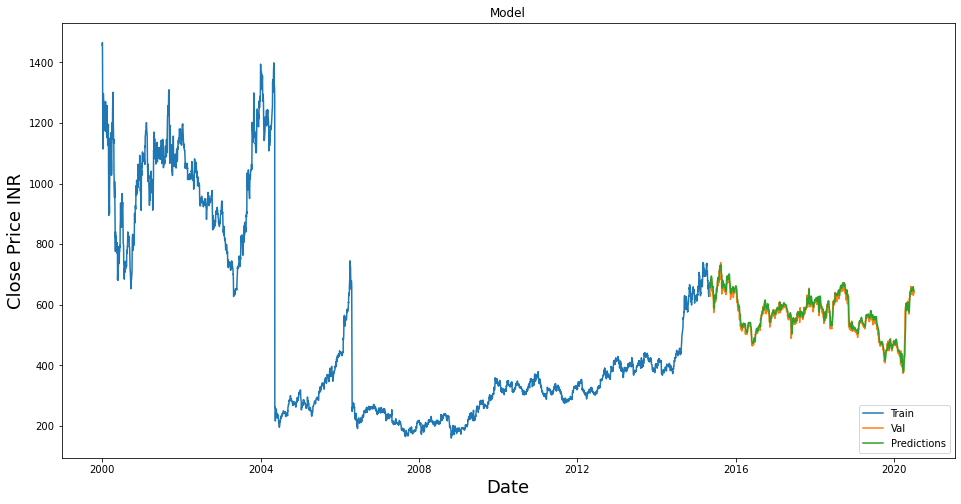

In [31]:
#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [32]:
valid

,Close,Predictions
Datetime,,
2015-05-06,636.25,666.961975
2015-05-07,627.80,666.438721
2015-05-08,654.70,658.189453
2015-05-11,666.10,656.449219
2015-05-12,664.10,661.019836
...,...,...
2020-06-24,631.20,659.559814
2020-06-25,634.90,656.693665
2020-06-26,634.90,651.605713


In [33]:
#Get the quote
cipla_quote = dataset.tail(100)

In [34]:
cipla_quote.head(5)

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Datetime,,,,,,,,,,,,,,
2020-02-01,CIPLA,EQ,446.90,446.50,452.20,437.75,445.60,444.20,446.49,1632513,7.288962e+13,23630.0,613319.0,0.3757
2020-02-03,CIPLA,EQ,444.20,444.00,450.65,439.40,443.80,444.55,444.09,1690394,7.506947e+13,48011.0,826982.0,0.4892
2020-02-04,CIPLA,EQ,444.55,446.70,452.45,444.20,447.70,448.45,449.37,2030860,9.125986e+13,43211.0,1023748.0,0.5041
2020-02-05,CIPLA,EQ,448.45,449.55,459.15,437.50,453.75,447.55,447.16,3637403,1.626518e+14,60500.0,1197984.0,0.3294
2020-02-06,CIPLA,EQ,447.55,462.50,464.35,435.35,438.55,439.65,446.16,7118843,3.176118e+14,125961.0,2716233.0,0.3816


In [35]:
#Create a new dataframe
new_dataset = cipla_quote.filter(['Close'])

In [36]:
#Get the last 100 day closing price 
last_100_days = new_dataset[-100:].values

In [37]:
#Scale the data to be values between 0 and 1
last_100_days_scaled = scaler.transform(last_100_days)

In [38]:
#Create an empty list
X_test = []
#Append teh past 100 days
X_test.append(last_100_days_scaled)

In [39]:
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[646.66254]]


In [40]:
#Get the quote
cipla_quote2 = dataset.tail(1)
print(cipla_quote2['Close'])

Datetime
2020-06-30    640.25
Name: Close, dtype: float64
